# SHAP套件測試
### [An introduction to explainable AI with Shapley values](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

## 載入相關套件

In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## 載入資料集

In [2]:
df = pd.read_csv('./data/ca_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 資料清理

In [3]:
# 刪除 missing value
df.dropna(inplace=True)

X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']

## 模型訓練與評估

In [4]:
# scaler = StandardScaler()
# X2 = scaler.fit_transform(X)
# X = pd.DataFrame(X2, columns=X.columns)

In [5]:
model = LinearRegression()
model.fit(X, y)
print("Model coefficients:")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:
longitude = -42730.12045
latitude = -42509.73694
housing_median_age = 1157.90031
total_rooms = -8.24973
total_bedrooms = 113.82071
population = -38.38558
households = 47.70135
median_income = 40297.52171


## 單一特徵影響力

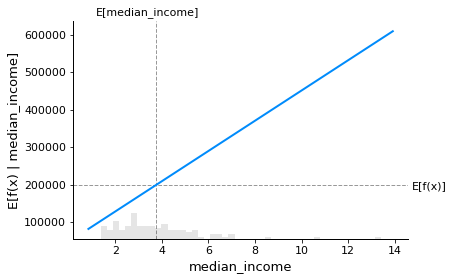

In [6]:
feature_name = "median_income"
X100 = shap.utils.sample(X, 100)
shap.partial_dependence_plot(
    feature_name, model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

## 衡量特徵Shapley value

Exact explainer: 20434it [01:32, 205.74it/s]                                                                           


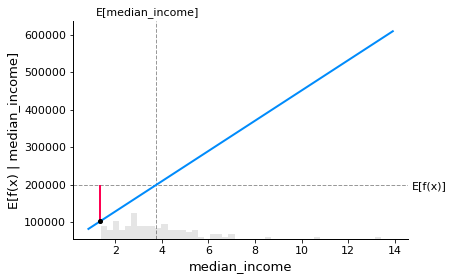

In [7]:
sample_ind = 20  # 第 21 筆資料
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)
shap.partial_dependence_plot(
    feature_name, model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

## 以單一特徵所有資料的Shapley value繪製散佈圖

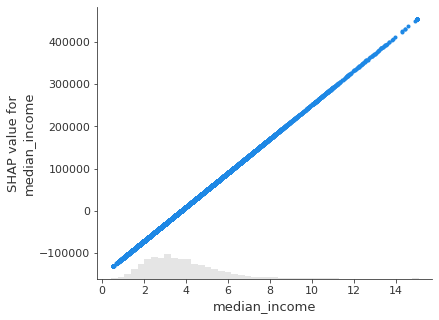

In [8]:
shap.plots.scatter(shap_values[:,feature_name])

## 單一資料的特徵影響力(Local Feature Importance)

In [20]:
X.iloc[sample_ind]

longitude            -122.2700
latitude               37.8500
housing_median_age     40.0000
total_rooms           751.0000
total_bedrooms        184.0000
population            409.0000
households            166.0000
median_income           1.3578
Name: 20, dtype: float64

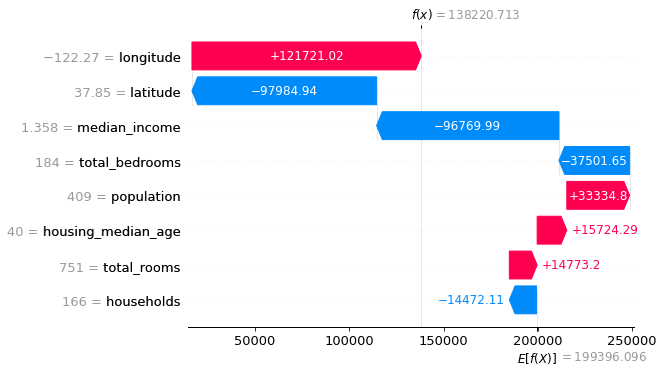

In [9]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

## 加法模型(Generalized additive models, GAM)

In [10]:
!pip install interpret

Exact explainer: 20434it [01:59, 156.73it/s]                                                                           


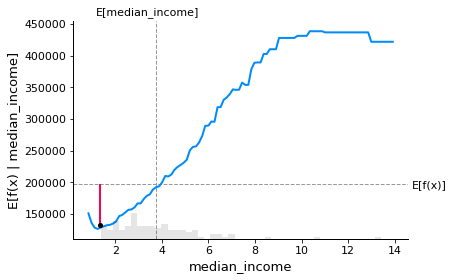

In [11]:
import interpret.glassbox

# 使用 Boosting 演算法
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# 加法模型 Shapley value
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# 特徵影響力
fig,ax = shap.partial_dependence_plot(
    feature_name, model_ebm.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:] # 第 21 筆資料
)

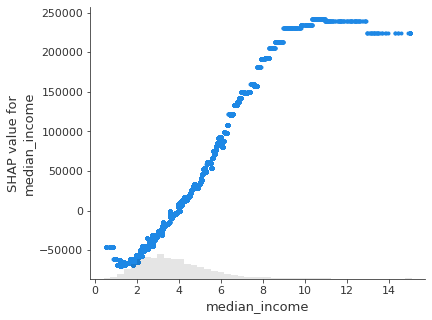

In [12]:
shap.plots.scatter(shap_values_ebm[:,feature_name])

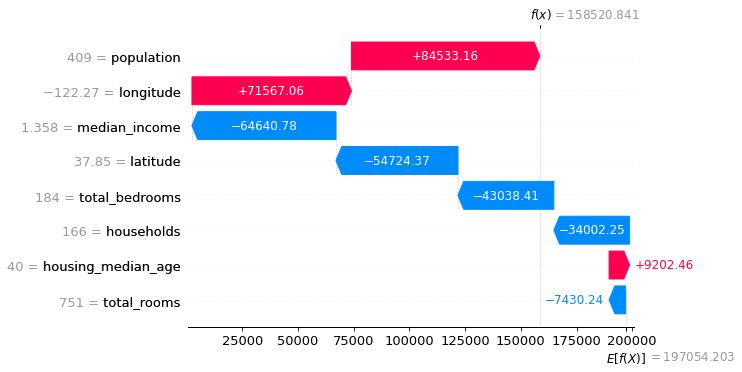

In [13]:
shap.plots.waterfall(shap_values_ebm[sample_ind])

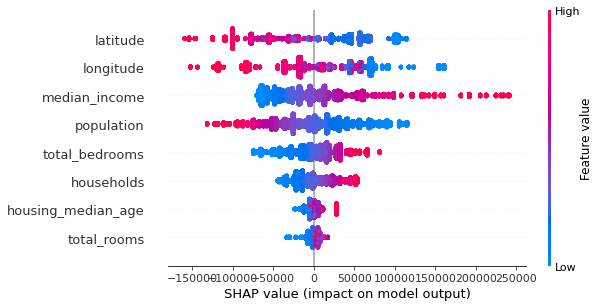

In [14]:
shap.plots.beeswarm(shap_values_ebm)

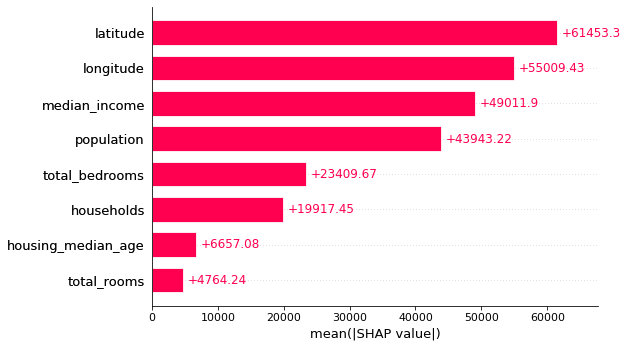

In [15]:
shap.plots.bar(shap_values_ebm)

In [18]:
shap.initjs()
shap.plots.force(shap_values_ebm[sample_ind])